In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bom.movie_gross.csv")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df['domestic_gross'].astype(float)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64

In [7]:
df["foreign_gross"] = pd.to_numeric(df["foreign_gross"], errors = "coerce")

In [8]:
df['foreign_gross'].fillna(df['foreign_gross'].median())

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382     18900000.0
3383     18900000.0
3384     18900000.0
3385     18900000.0
3386     18900000.0
Name: foreign_gross, Length: 3387, dtype: float64

In [9]:
df.duplicated().value_counts()

False    3387
Name: count, dtype: int64

In [10]:
df.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [11]:
df.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


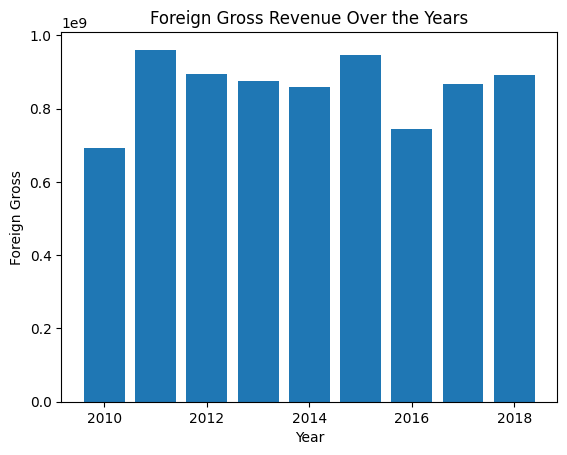

In [12]:
plt.bar(df['year'], df['foreign_gross'])
plt.xlabel('Year')
plt.ylabel('Foreign Gross')
plt.title('Foreign Gross Revenue Over the Years')
plt.show()           

From 2010 to 2011, there was a positive trend in the increase of foreign gross revenue. However, from 2012 to 2014, there was a negative trend in foreign gross revenue for three consecutive years. In 2015, there was a significant spike in foreign gross revenue, followed by a drop in revenue in 2016. Subsequently, from 2017 to 2018, foreign gross revenue increased steadily.

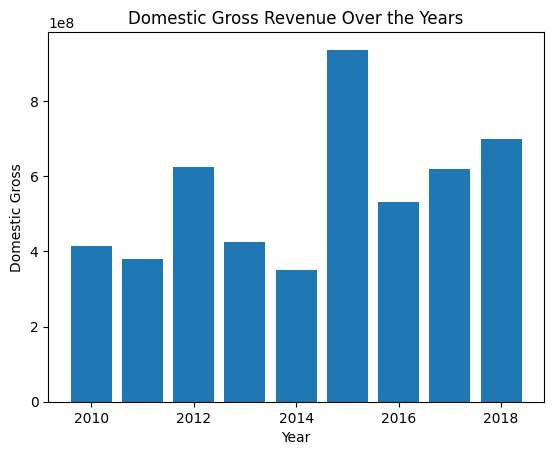

In [13]:
plt.bar(df['year'], df['domestic_gross'])
plt.xlabel('Year')
plt.ylabel('Domestic Gross')
plt.title('Domestic Gross Revenue Over the Years')
plt.show()

From 2010 to 2011, there was a slight drop in domestic gross revenue. In 2012, there was a significant spike in domestic revenue. In 2013, a steady negative trend in domestic gross revenue continued until 2014. However, from 2015 to 2018, there was a steady and consistent positive trend in domestic gross revenue.

<Axes: xlabel='studio'>

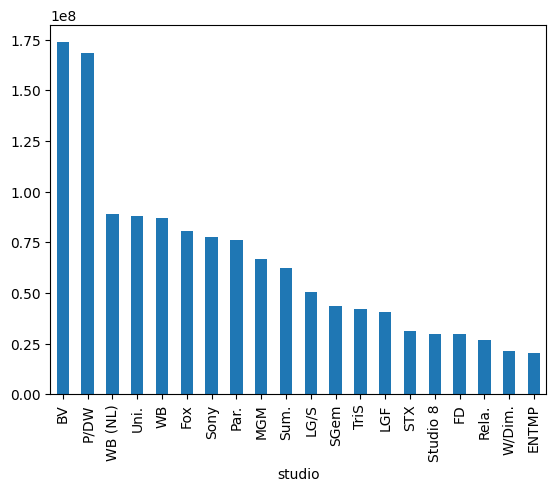

In [14]:
df.groupby('studio')['domestic_gross'].mean().sort_values(ascending=False)[:20].plot(kind='bar')

P/DW has the highest domestic gross revenue, followed by BV studio. There is a significant gap between the first two studios and the others. From WB studio, the domestic gross revenue decreases steadily until Studio 8. Notably, the domestic gross revenue of Par studio and Sony studio is equal.    

<Axes: xlabel='studio'>

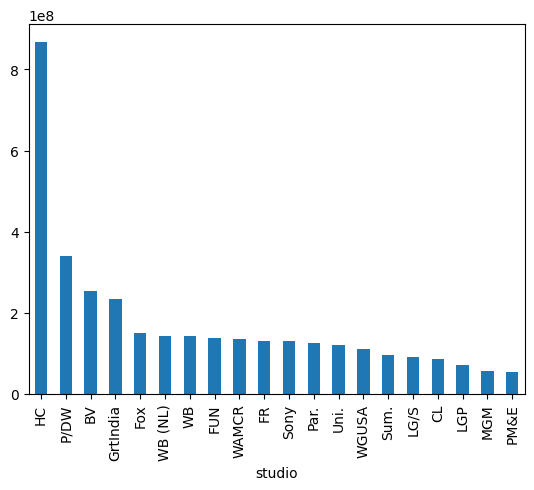

In [15]:
df.groupby('studio')['foreign_gross'].mean().sort_values(ascending=False)[:20].plot(kind='bar')

HC leads with the highest foreign gross revenue, significantly ahead of P/DW, which has a substantial gap in between. BV studio follows, but then there is a continuous negative trend observed as we move through the other studios.

In [16]:
total_gross = df['foreign_gross'] + df['domestic_gross'] 
print(total_gross)

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3382             NaN
3383             NaN
3384             NaN
3385             NaN
3386             NaN
Length: 3387, dtype: float64


In [17]:
df['total_gross'] = df['foreign_gross'] + df['domestic_gross']
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,NaN
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,NaN
3384,El Pacto,Sony,2500.0,NaN,2018,NaN
3385,The Swan,Synergetic,2400.0,NaN,2018,NaN


<Axes: xlabel='studio'>

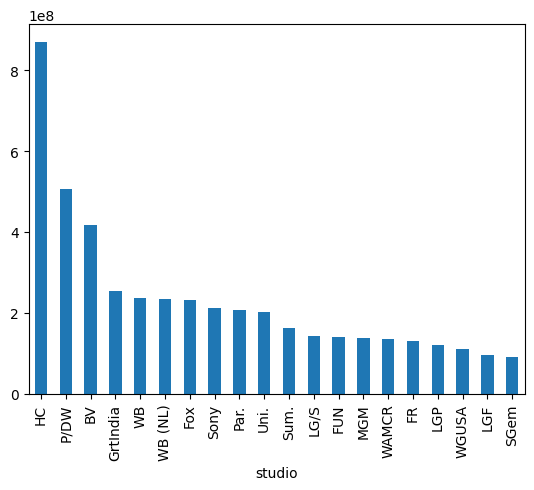

In [18]:
df.groupby('studio')['total_gross'].mean().sort_values(ascending=False)[:20].plot(kind='bar')